In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
import os
# import the path
path = os.path.abspath(os.path.join("..", "01_get_the_data", "spy_historical_data.csv"))

In [45]:
# Load the CSV
df = pd.read_csv(path)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# convert df.datetime to datetime
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y-%m-%d %H:%M:%S')

# Show the result
df.head()

,datetime,SPY
0,2021-08-31 16:30:00,451.56
1,2021-09-01 16:30:00,451.80
2,2021-09-02 16:30:00,453.19
3,2021-09-03 16:30:00,453.08
4,2021-09-07 16:30:00,451.46


In [ ]:
# Calculate simple returns with pct_change()
simple_returns = df['SPY'].pct_change().fillna(0)

# Calculate log returns
log_returns = (1 + simple_returns).apply(np.log)

# Cumulative sum of simple returns (not correct for compounding)
cumsum_simple = simple_returns.cumsum()

# Cumulative product of simple returns (correct for compounding)
cumprod_simple = (1 + simple_returns).cumprod() - 1

# Cumulative sum of log returns (correct for compounding)
cumsum_log = log_returns.cumsum()
cumprod_log = np.exp(cumsum_log) - 1

# Using cumsum() for returns is only valid for log returns. 
# For simple returns, you should compound (cumprod())

# print("Simple returns:\n", simple_returns.round(4).to_list())
# print("Cumulative sum (simple):\n", cumsum_simple.round(4).to_list())
# print("Cumulative product (simple):\n", cumprod_simple.round(4).to_list())
# print("Log returns:\n", log_returns.round(4).to_list())
# print("Cumulative sum (log):\n", cumsum_log.round(4).to_list())
# print("Exp(cumsum(log)) - 1:\n", cumprod_log.round(4).to_list())

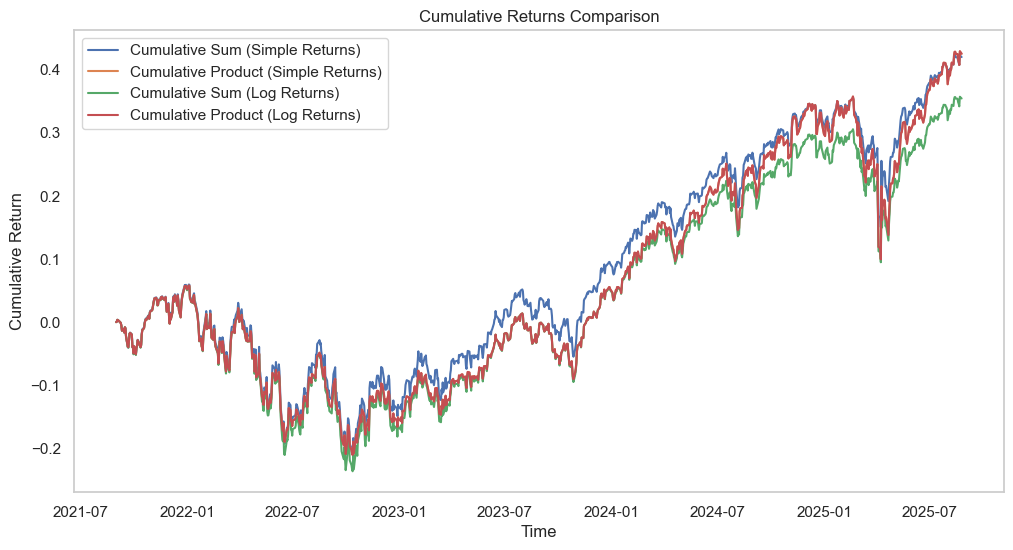

In [47]:
# plot cumsum_simple, cumprod_simple, cumsum_log, cumprod_log and datetime
# Set the style
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], cumsum_simple, label='Cumulative Sum (Simple Returns)')
plt.plot(df['datetime'], cumprod_simple, label='Cumulative Product (Simple Returns)')
plt.plot(df['datetime'], cumsum_log, label='Cumulative Sum (Log Returns)')
plt.plot(df['datetime'], cumprod_log, label='Cumulative Product (Log Returns)')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid()
plt.show()

## Explanation of Returns Calculations
- **Simple returns**: The percentage change between each price and the previous one. It measures the direct change from one period to the next.
- **Cumulative sum of simple returns (`cumsum_simple`)**: Adds up the simple returns over time, but does not account for compounding. This can overstate the total return for longer periods.
- **Cumulative product of simple returns (`cumprod_simple`)**: Multiplies the returns, correctly compounding them over time. This gives the true total return, including the effect of earning returns on previous returns.
- **Log returns (`log_returns`)**: The logarithm of (1 + simple return). Log returns are additive over time, which makes them useful for mathematical analysis and modeling.
- **Cumulative sum of log returns (`cumsum_log`)**: Sums the log returns over time. If you exponentiate this sum, you get the compounded return.
- **Cumulative product of log returns (`cumprod_log`)**: Equivalent to `cumprod_simple`, but calculated using log returns. It also represents the compounded return over time.